In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

file_path = "/content/drive/MyDrive/Game Day Challenge 2025/Dataset 2025/Clean_data2025(1).csv"
if os.path.exists(file_path):
    print("File found!")
else:
    print("File not found. Check the path.")


File found!


In [6]:
!pip install textblob

In [7]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [8]:
df = pd.read_csv(file_path)  # Replace with actual file path
df.head()

<ipython-input-8-15e5cd92e99d>:1: DtypeWarning: Columns (33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)  # Replace with actual file path


,created_at,text,conversation_id,reply_settings,edit_history_tweet_ids,lang,referenced_tweets,possibly_sensitive,id,author_id,...,hashtags,emojis,mentions,clean_text,tokens,sentiment,sentiment_category,has_mentions,popular_brand,brand_from_mentions
0,2025-02-10T03:16:57.000Z,RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...,1888789225308409951,everyone,['1888789225308409951'],es,"[{'type': 'retweeted', 'id': '1888782268186890...",False,1888789225308409951,206743570,...,NaN,NaN,"['@patriotslatam', '@TomBrady']",RT @patriotslatam: Sólo hay uno como ÉL. Abraz...,"['sólo', 'hay', 'uno', 'como']",0.000000,Neutral,True,Dunkin',[]
1,2025-02-10T03:16:49.000Z,RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...,1888789188876894329,everyone,['1888789188876894329'],es,"[{'type': 'retweeted', 'id': '1888782268186890...",False,1888789188876894329,282285390,...,NaN,NaN,"['@patriotslatam', '@TomBrady']",RT @patriotslatam: Sólo hay uno como ÉL. Abraz...,"['sólo', 'hay', 'uno', 'como']",0.000000,Neutral,True,Dunkin',[]
2,2025-02-10T03:16:48.000Z,THE ONLY GOAT. 🐐 @TomBrady\n\n#SuperBowl https...,1888789186284503124,everyone,['1888789186284503124'],en,NaN,False,1888789186284503124,246885450,...,['#SuperBowl'],['🐐'],['@TomBrady'],THE ONLY GOAT. 🐐 @TomBrady #SuperBowl,[],0.000000,Neutral,True,Dunkin',[]
3,2025-02-10T03:16:46.000Z,I love you @TomBrady,1888789179074793761,everyone,['1888789179074793761'],en,NaN,False,1888789179074793761,1921582838,...,NaN,NaN,['@TomBrady'],I love you @TomBrady,['love'],0.500000,Positive,True,Dunkin',[]
4,2025-02-10T03:16:45.000Z,RT @billboard: Ben Affleck Brings Back the Dun...,1888789174926319942,everyone,['1888789174926319942'],en,"[{'type': 'retweeted', 'id': '1888737296708472...",False,1888789174926319942,30152016,...,NaN,NaN,['@billboard'],RT @billboard: Ben Affleck Brings Back the Dun...,"['ben', 'affleck', 'brings', 'back', 'dunkings...",0.166667,Positive,True,Dunkin',[]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69536 entries, 0 to 69535
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   created_at                         69536 non-null  object 
 1   text                               69536 non-null  object 
 2   conversation_id                    69536 non-null  int64  
 3   reply_settings                     69536 non-null  object 
 4   edit_history_tweet_ids             69536 non-null  object 
 5   lang                               69536 non-null  object 
 6   referenced_tweets                  60362 non-null  object 
 7   possibly_sensitive                 69536 non-null  bool   
 8   id                                 69536 non-null  int64  
 9   author_id                          69536 non-null  int64  
 10  entities.annotations               45729 non-null  object 
 11  entities.mentions                  62144 non-null  obj

In [10]:
df.isna().sum()

,0
created_at,0
text,0
conversation_id,0
reply_settings,0
edit_history_tweet_ids,0
lang,0
referenced_tweets,9174
possibly_sensitive,0
id,0
author_id,0


In [11]:
df.describe()

,conversation_id,id,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count,edit_controls.edits_remaining,in_reply_to_user_id,sentiment
count,6.953600e+04,6.953600e+04,6.953600e+04,69536.000000,69536.000000,69536.000000,69536.000000,69536.000000,6.953600e+04,69536.000000,1.918700e+04,69536.000000
mean,1.888446e+18,1.888785e+18,8.266552e+17,1977.137670,0.517473,15.760340,0.182884,0.461847,1.075502e+03,4.997800,4.011506e+17,0.085458
std,1.027211e+16,8.909283e+12,7.503343e+17,5945.757487,24.295762,1389.768017,15.366977,36.996447,7.720030e+04,0.061927,6.446232e+17,0.271817
min,8.500303e+17,1.888649e+18,1.022100e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.605000e+03,-1.000000
25%,1.888782e+18,1.888786e+18,5.950873e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,5.000000,9.279316e+07,0.000000
50%,1.888787e+18,1.888788e+18,9.678690e+17,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,5.000000,1.447153e+09,0.000000
75%,1.888788e+18,1.888789e+18,1.545173e+18,1046.000000,0.000000,0.000000,0.000000,0.000000,1.200000e+01,5.000000,8.888078e+17,0.175000
max,1.888789e+18,1.888789e+18,1.888789e+18,115874.000000,4332.000000,291881.000000,2575.000000,8474.000000,1.554963e+07,5.000000,1.888789e+18,1.000000


In [12]:
twitter_data = df

In [13]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69536 entries, 0 to 69535
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   created_at                         69536 non-null  object 
 1   text                               69536 non-null  object 
 2   conversation_id                    69536 non-null  int64  
 3   reply_settings                     69536 non-null  object 
 4   edit_history_tweet_ids             69536 non-null  object 
 5   lang                               69536 non-null  object 
 6   referenced_tweets                  60362 non-null  object 
 7   possibly_sensitive                 69536 non-null  bool   
 8   id                                 69536 non-null  int64  
 9   author_id                          69536 non-null  int64  
 10  entities.annotations               45729 non-null  object 
 11  entities.mentions                  62144 non-null  obj

In [ ]:
twitter_data.head()

,created_at,text,conversation_id,reply_settings,edit_history_tweet_ids,lang,referenced_tweets,possibly_sensitive,id,author_id,...,hashtags,emojis,mentions,clean_text,tokens,sentiment,sentiment_category,has_mentions,popular_brand,brand_from_mentions
0,2025-02-10T03:16:57.000Z,RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...,1888789225308409951,everyone,['1888789225308409951'],es,"[{'type': 'retweeted', 'id': '1888782268186890...",False,1888789225308409951,206743570,...,NaN,NaN,"['@patriotslatam', '@TomBrady']",RT @patriotslatam: Sólo hay uno como ÉL. Abraz...,"['sólo', 'hay', 'uno', 'como']",0.000000,Neutral,True,Dunkin',[]
1,2025-02-10T03:16:49.000Z,RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...,1888789188876894329,everyone,['1888789188876894329'],es,"[{'type': 'retweeted', 'id': '1888782268186890...",False,1888789188876894329,282285390,...,NaN,NaN,"['@patriotslatam', '@TomBrady']",RT @patriotslatam: Sólo hay uno como ÉL. Abraz...,"['sólo', 'hay', 'uno', 'como']",0.000000,Neutral,True,Dunkin',[]
2,2025-02-10T03:16:48.000Z,THE ONLY GOAT. 🐐 @TomBrady\n\n#SuperBowl https...,1888789186284503124,everyone,['1888789186284503124'],en,NaN,False,1888789186284503124,246885450,...,['#SuperBowl'],['🐐'],['@TomBrady'],THE ONLY GOAT. 🐐 @TomBrady #SuperBowl,[],0.000000,Neutral,True,Dunkin',[]
3,2025-02-10T03:16:46.000Z,I love you @TomBrady,1888789179074793761,everyone,['1888789179074793761'],en,NaN,False,1888789179074793761,1921582838,...,NaN,NaN,['@TomBrady'],I love you @TomBrady,['love'],0.500000,Positive,True,Dunkin',[]
4,2025-02-10T03:16:45.000Z,RT @billboard: Ben Affleck Brings Back the Dun...,1888789174926319942,everyone,['1888789174926319942'],en,"[{'type': 'retweeted', 'id': '1888737296708472...",False,1888789174926319942,30152016,...,NaN,NaN,['@billboard'],RT @billboard: Ben Affleck Brings Back the Dun...,"['ben', 'affleck', 'brings', 'back', 'dunkings...",0.166667,Positive,True,Dunkin',[]


In [ ]:
twitter_data.isna().sum()

,0
created_at,0
text,0
conversation_id,0
reply_settings,0
edit_history_tweet_ids,0
lang,0
referenced_tweets,9174
possibly_sensitive,0
id,0
author_id,0


In [ ]:
df = df.drop_duplicates()

In [3]:
twitter_data = df
import regex
def extract_hashtags(text):
    hashtags = regex.findall(r'\#\w+', text)
    if hashtags:
        return hashtags
    else:
        return ""

def extract_emojis(text):
    emoji_pattern = regex.compile("["
                                  u"\U0001F600-\U0001F64F"
                                  u"\U0001F300-\U0001F5FF"
                                  u"\U0001F680-\U0001F6FF"
                                  u"\U0001F1E0-\U0001F1FF"
                                  u"\U00002702-\U000027B0"
                                  u"\U000024C2-\U0001F251"
                                  "]+", flags=regex.UNICODE)
    emojis = emoji_pattern.findall(text)
    if emojis:
        return emojis
    else:
        return ""

def extract_mentions(text):
    mentions = regex.findall(r'\@\w+', text)
    if mentions:
        return mentions
    else:
        return ""


twitter_data['hashtags'] = twitter_data['text'].apply(extract_hashtags)
twitter_data['emojis'] = twitter_data['text'].apply(extract_emojis)
twitter_data['mentions'] = twitter_data['text'].apply(extract_mentions)

twitter_data[['hashtags', 'emojis', 'mentions']].head()

NameError: name 'df' is not defined

In [ ]:
d = twitter_data.head(1000)
data = d.to_csv ("sample.csv", index = False)

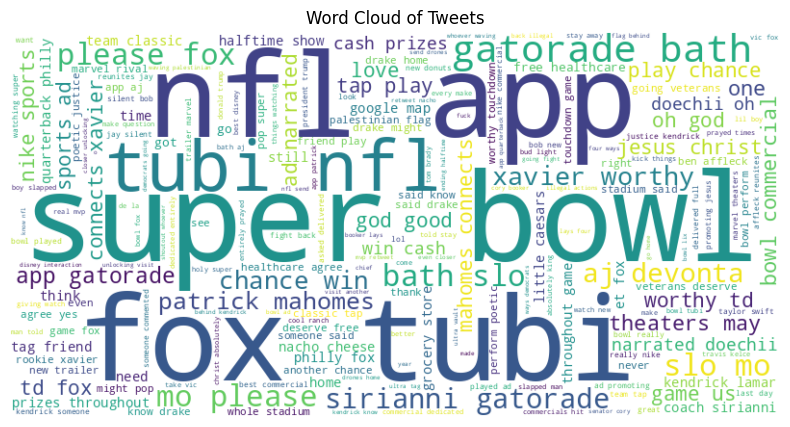

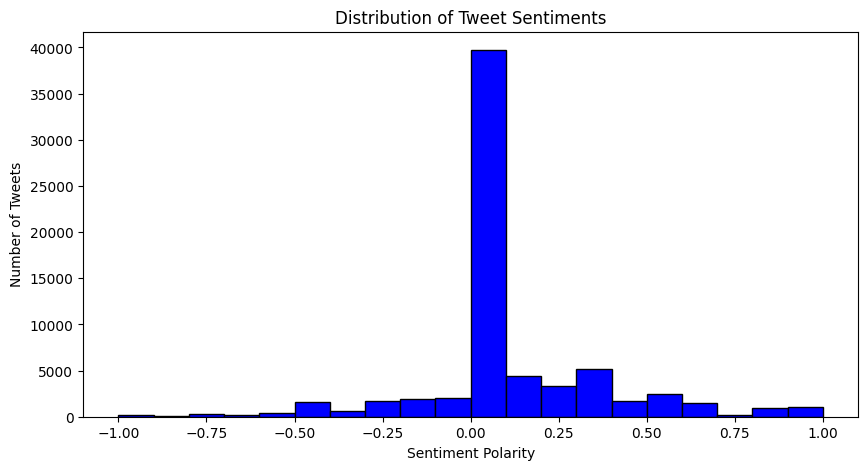

                                                text  \
0  RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...   
1  RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...   
2  THE ONLY GOAT. 🐐 @TomBrady\n\n#SuperBowl https...   
3                               I love you @TomBrady   
4  RT @billboard: Ben Affleck Brings Back the Dun...   

                                          clean_text  sentiment  
0  RT @patriotslatam: Sólo hay uno como ÉL. Abraz...   0.000000  
1  RT @patriotslatam: Sólo hay uno como ÉL. Abraz...   0.000000  
2              THE ONLY GOAT. 🐐 @TomBrady #SuperBowl   0.000000  
3                               I love you @TomBrady   0.500000  
4  RT @billboard: Ben Affleck Brings Back the Dun...   0.166667  


In [ ]:
def remove_urls(text):
    return " ".join([word for word in text.split() if 'http' not in word and 'www' not in word])

custom_stopwords =set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now", "rt", "https", "vol", "written"
])

def clean_and_tokenize(text):
    return [word.lower() for word in text.split()
            if word.lower() not in custom_stopwords and word.isalpha()]

def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

twitter_data = twitter_data.dropna(subset = ['text'])
twitter_data['clean_text'] = twitter_data['text'].apply(remove_urls)
twitter_data['tokens'] = twitter_data['clean_text'].apply(clean_and_tokenize)
twitter_data['sentiment'] = twitter_data['clean_text'].apply(calculate_sentiment)

all_words = ' '.join([word for tokens in twitter_data['tokens'] for word in tokens])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.title("Word Cloud of Tweets")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(twitter_data['sentiment'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Tweet Sentiments')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Tweets')
plt.show()

print(twitter_data[['text', 'clean_text', 'sentiment']].head())

In [ ]:
print(twitter_data.columns)  # List all column names


Index(['created_at', 'text', 'conversation_id', 'reply_settings',
       'edit_history_tweet_ids', 'lang', 'referenced_tweets',
       'possibly_sensitive', 'id', 'author_id', 'entities.annotations',
       'entities.mentions', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.quote_count', 'public_metrics.bookmark_count',
       'public_metrics.impression_count', 'edit_controls.edits_remaining',
       'edit_controls.is_edit_eligible', 'edit_controls.editable_until',
       'entities.urls', 'attachments.media_keys', 'entities.hashtags',
       'in_reply_to_user_id', 'attachments.media_source_tweet_id',
       'entities.cashtags', 'location', 'username', 'name', 'brand',
       'geo.place_id', 'attachments.poll_ids', 'withheld.country_codes',
       'geo.coordinates.type', 'geo.coordinates.coordinates', 'hashtags',
       'emojis', 'mentions', 'clean_text', 'tokens', 'sentiment',
       'sentiment_category', 'has_me

Text(0, 0.5, 'Number of tweets')

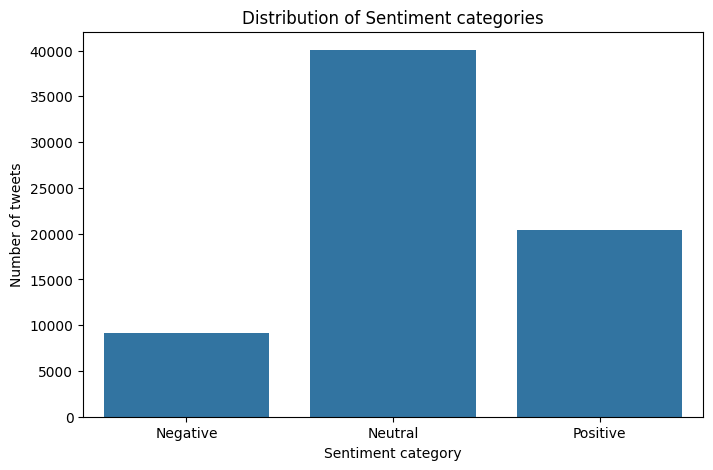

In [ ]:
def categorize_sentiment(score):
    if score < 0:
        return 'Negative'
    elif score > 0.12:
        return 'Positive'
    else:
        return 'Neutral'


twitter_data['sentiment_category'] = twitter_data['sentiment'].apply(categorize_sentiment)

#reach_analysis = twitter_data['keyword'].value_counts().head(15)

engagement_analysis = twitter_data['sentiment_category'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=engagement_analysis.index, y=engagement_analysis.values, order=['Negative', 'Neutral', 'Positive'])
plt.title('Distribution of Sentiment categories')
plt.xlabel('Sentiment category')
plt.ylabel('Number of tweets')

In [ ]:
twitter_data['sentiment_category'] = twitter_data['sentiment_category'].astype('category')

most_frequent_category = twitter_data['sentiment_category'].value_counts().index[0]
twitter_data['sentiment_category'].fillna(most_frequent_category, inplace= True)

<ipython-input-24-ef7b93eb7a26>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  twitter_data['sentiment_category'].fillna(most_frequent_category, inplace= True)


In [ ]:
twitter_data.isna().sum()

,0
created_at,0
text,0
conversation_id,0
reply_settings,0
edit_history_tweet_ids,0
lang,0
referenced_tweets,9174
possibly_sensitive,0
id,0
author_id,0


In [ ]:
twitter_data['has_mentions'] = twitter_data['mentions'].apply(lambda x: len(x) > 0)

tweets_with_mentions_count = twitter_data['has_mentions'].sum()
tweets_without_mentions_count = len(twitter_data) - tweets_with_mentions_count

tweets_with_mentions_count, tweets_without_mentions_count

(62162, 7374)

In [ ]:
twitter_data.head()

,created_at,text,conversation_id,reply_settings,edit_history_tweet_ids,lang,referenced_tweets,possibly_sensitive,id,author_id,...,hashtags,emojis,mentions,clean_text,tokens,sentiment,sentiment_category,has_mentions,popular_brand,brand_from_mentions
0,2025-02-10T03:16:57.000Z,RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...,1888789225308409951,everyone,['1888789225308409951'],es,"[{'type': 'retweeted', 'id': '1888782268186890...",False,1888789225308409951,206743570,...,,,"[@patriotslatam, @TomBrady]",RT @patriotslatam: Sólo hay uno como ÉL. Abraz...,"[sólo, hay, uno, como]",0.000000,Neutral,True,Dunkin',[]
1,2025-02-10T03:16:49.000Z,RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...,1888789188876894329,everyone,['1888789188876894329'],es,"[{'type': 'retweeted', 'id': '1888782268186890...",False,1888789188876894329,282285390,...,,,"[@patriotslatam, @TomBrady]",RT @patriotslatam: Sólo hay uno como ÉL. Abraz...,"[sólo, hay, uno, como]",0.000000,Neutral,True,Dunkin',[]
2,2025-02-10T03:16:48.000Z,THE ONLY GOAT. 🐐 @TomBrady\n\n#SuperBowl https...,1888789186284503124,everyone,['1888789186284503124'],en,NaN,False,1888789186284503124,246885450,...,[#SuperBowl],[🐐],[@TomBrady],THE ONLY GOAT. 🐐 @TomBrady #SuperBowl,[],0.000000,Neutral,True,Dunkin',[]
3,2025-02-10T03:16:46.000Z,I love you @TomBrady,1888789179074793761,everyone,['1888789179074793761'],en,NaN,False,1888789179074793761,1921582838,...,,,[@TomBrady],I love you @TomBrady,[love],0.500000,Positive,True,Dunkin',[]
4,2025-02-10T03:16:45.000Z,RT @billboard: Ben Affleck Brings Back the Dun...,1888789174926319942,everyone,['1888789174926319942'],en,"[{'type': 'retweeted', 'id': '1888737296708472...",False,1888789174926319942,30152016,...,,,[@billboard],RT @billboard: Ben Affleck Brings Back the Dun...,"[ben, affleck, brings, back, dunkings, lineup,...",0.166667,Positive,True,Dunkin',[]


In [ ]:
twitter_data.isna().sum()

,0
created_at,0
text,0
conversation_id,0
reply_settings,0
edit_history_tweet_ids,0
lang,0
referenced_tweets,9174
possibly_sensitive,0
id,0
author_id,0


In [ ]:
twitter_data.to_csv('Clean_data2025(1).csv', index = False)
#data = pd.read_csv('Clean_data2025(1).csv')

In [ ]:

import pandas as pd
import json
from collections import Counter


# Ensure required columns exist
required_columns = {"text", "entities.mentions", "brand_from_mentions", "mentions"}
missing_columns = required_columns - set(df.columns)
if missing_columns:
    raise ValueError(f"Missing required columns in the dataset: {missing_columns}")

# Handle missing values
df['text'] = df['text'].fillna("").astype(str)
df['entities.mentions'] = df['entities.mentions'].fillna("[]").astype(str)  # Convert empty values to JSON lists
df['brand_from_mentions'] = df['brand_from_mentions'].fillna("").astype(str)
df['mentions'] = df['mentions'].fillna("[]").astype(str)

# Convert 'mentions' column from string representation of list to actual list
df['mentions'] = df['mentions'].apply(lambda x: eval(x) if isinstance(x, str) and x else [])

# Flatten mentions and merge with explicit brand mentions
all_mentions = df.explode('mentions')[['mentions', 'brand_from_mentions']].dropna()

# Combine brand mentions from both sources
all_mentions['Brand'] = all_mentions['mentions'].combine_first(all_mentions['brand_from_mentions'])

# Remove empty values
all_mentions = all_mentions.dropna(subset=['Brand'])

# Count occurrences of each brand (ad)
brand_counts = all_mentions['Brand'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Mention Count']

# Extract top 10 most mentioned ads
top_10_ads = brand_counts.head(10)
top_10_file = "top_10_most_mentioned_ads.csv"
top_10_ads.to_csv(top_10_file, index=False, encoding='utf-8-sig')

# Print confirmation
print("CSV file saved successfully: most_mentioned_ads.csv")

CSV file saved successfully: most_mentioned_ads.csv


In [ ]:
twitter_data.head()

,created_at,text,conversation_id,reply_settings,edit_history_tweet_ids,lang,referenced_tweets,possibly_sensitive,id,author_id,...,hashtags,emojis,mentions,clean_text,tokens,sentiment,sentiment_category,has_mentions,popular_brand,brand_from_mentions
0,2025-02-10T03:16:57.000Z,RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...,1888789225308409951,everyone,['1888789225308409951'],es,"[{'type': 'retweeted', 'id': '1888782268186890...",False,1888789225308409951,206743570,...,,,"[@patriotslatam, @TomBrady]",RT @patriotslatam: Sólo hay uno como ÉL. Abraz...,"[sólo, hay, uno, como]",0.000000,Neutral,True,Dunkin',[]
1,2025-02-10T03:16:49.000Z,RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...,1888789188876894329,everyone,['1888789188876894329'],es,"[{'type': 'retweeted', 'id': '1888782268186890...",False,1888789188876894329,282285390,...,,,"[@patriotslatam, @TomBrady]",RT @patriotslatam: Sólo hay uno como ÉL. Abraz...,"[sólo, hay, uno, como]",0.000000,Neutral,True,Dunkin',[]
2,2025-02-10T03:16:48.000Z,THE ONLY GOAT. 🐐 @TomBrady\n\n#SuperBowl https...,1888789186284503124,everyone,['1888789186284503124'],en,NaN,False,1888789186284503124,246885450,...,[#SuperBowl],[🐐],[@TomBrady],THE ONLY GOAT. 🐐 @TomBrady #SuperBowl,[],0.000000,Neutral,True,Dunkin',[]
3,2025-02-10T03:16:46.000Z,I love you @TomBrady,1888789179074793761,everyone,['1888789179074793761'],en,NaN,False,1888789179074793761,1921582838,...,,,[@TomBrady],I love you @TomBrady,[love],0.500000,Positive,True,Dunkin',[]
4,2025-02-10T03:16:45.000Z,RT @billboard: Ben Affleck Brings Back the Dun...,1888789174926319942,everyone,['1888789174926319942'],en,"[{'type': 'retweeted', 'id': '1888737296708472...",False,1888789174926319942,30152016,...,,,[@billboard],RT @billboard: Ben Affleck Brings Back the Dun...,"[ben, affleck, brings, back, dunkings, lineup,...",0.166667,Positive,True,Dunkin',[]


In [ ]:
twitter_data.isna().sum()

,0
created_at,0
text,0
conversation_id,0
reply_settings,0
edit_history_tweet_ids,0
lang,0
referenced_tweets,9174
possibly_sensitive,0
id,0
author_id,0


In [ ]:
d = twitter_data.head(1000)
data = d.to_csv ("sample.csv", index = False)

In [ ]:
# Top 10 Hash tag

import pandas as pd
import re
from collections import Counter



# Function to extract hashtags
def extract_hashtags(text):
    return re.findall(r"#\w+", text)

# Collect all hashtags from tweets (convert to lowercase)
all_hashtags = [hashtag.lower() for text in df["text"].dropna() for hashtag in extract_hashtags(text)]

# Count hashtag occurrences
hashtag_counts = Counter(all_hashtags)

# Extract the top 20 most tweeted hashtags
top_20_hashtags = hashtag_counts.most_common(20)

# Convert to a DataFrame
hashtags_df = pd.DataFrame(top_20_hashtags, columns=["Hashtag", "Count"])

# Save DataFrame to CSV file (UTF-8 encoding for compatibility)
hashtags_df.to_csv("top_hashtags.csv", index=False, encoding='utf-8')

print("Complte Save csv file: top_hashtags.csv")

# Print the result
print(hashtags_df)


Complte Save csv file: top_hashtags.csv
            Hashtag  Count
0            #sblix   9319
1      #sweepstakes   5222
2     #playforultra   3563
3        #superbowl   2080
4         #onlylays   2061
5     #superbowllix   1691
6   #thisbudsforyou   1547
7     #doritoscrash   1274
8            #entry    752
9              #nfl    713
10    #flyeaglesfly    600
11       #gemini_nt    520
12    #thunderbolts    511
13        #tombrady    479
14             #เจม    457
15       #nonogirls    453
16       #ディズニーステップ    414
17  #watchthelastad    410
18            #hana    321
19            #bmoc    318


In [ ]:
twitter_data.to_csv('Clean_data2025(1).csv', index = False)
data = pd.read_csv('Clean_data2025(1).csv')

<ipython-input-36-f67a91519462>:2: DtypeWarning: Columns (33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Clean_data2025(1).csv')


In [ ]:
import pandas as pd

# Ensure the 'brand' column exists
if "brand" not in df.columns:
    raise ValueError("The dataset does not contain a 'brand' column.")

# Extract the top 10 most tweeted brands
top_10_brands = df["brand"].dropna().str.lower().value_counts().head(10)

# Convert to DataFrame
brands_df = pd.DataFrame(top_10_brands).reset_index()
brands_df.columns = ["Brand", "Count"]

# Check the number of unique brands
num_unique_brands = df["brand"].nunique()
print(f"The number of unique brands: {num_unique_brands}")

# Count occurrences of all brands
top_tweeted_brands_df = df["brand"].dropna().str.lower().value_counts().reset_index()
top_tweeted_brands_df.columns = ["Brand", "Count"]

# Save the full list of top tweeted brands to a CSV file for Tableau
top_brands_csv = "top_tweeted_brands.csv"
top_tweeted_brands_df.to_csv(top_brands_csv, index=False, encoding='utf-8-sig')

# Save the top 10 brands to a separate CSV file
top_10_csv = "top_10_tweeted_brands.csv"
brands_df.to_csv(top_10_csv, index=False, encoding='utf-8-sig')


# Print confirmation
print("CSV files saved successfully:")
print(f"- Full Top Tweeted Brands List: {top_brands_csv}")
print(f"- Top 10 Tweeted Brands: {top_10_csv}")



The number of unique brands: 59
CSV files saved successfully:
- Full Top Tweeted Brands List: top_tweeted_brands.csv
- Top 10 Tweeted Brands: top_10_tweeted_brands.csv


In [ ]:
import os

print("file exist:", os.path.exists("top_hashtags.csv"))
print(pd.read_csv("top_hashtags.csv").head())


file exist: True
Empty DataFrame
Columns: [Unnamed: 0, Brand, Count]
Index: []


In [14]:
twitter_data.to_csv('Clean_data2025(1).csv', index = False)
data = pd.read_csv('Clean_data2025(1).csv')

<ipython-input-14-f67a91519462>:2: DtypeWarning: Columns (33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Clean_data2025(1).csv')


In [15]:
# Look for timezone-related columns
timezone_columns = [col for col in data.columns if "timezone" in col.lower() or "utc" in col.lower()] # Changed 'df' to 'data'
print("Possible timezone-related columns:", timezone_columns)

# Display unique values if such columns exist
if timezone_columns:
    print(data[timezone_columns].dropna().head(10)) # Changed 'df' to 'data'
else:
    print("No explicit timezone column found.")


Possible timezone-related columns: []
No explicit timezone column found.


In [16]:

df = pd.read_csv('Clean_data2025(1).csv')  # Read the data back into 'df'
df["created_at"] = pd.to_datetime(df["created_at"], errors="coerce")
print(df["created_at"].head(10))


<ipython-input-16-4a3feb53ae56>:1: DtypeWarning: Columns (33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Clean_data2025(1).csv')  # Read the data back into 'df'


0   2025-02-10 03:16:57+00:00
1   2025-02-10 03:16:49+00:00
2   2025-02-10 03:16:48+00:00
3   2025-02-10 03:16:46+00:00
4   2025-02-10 03:16:45+00:00
5   2025-02-10 03:16:45+00:00
6   2025-02-10 03:16:43+00:00
7   2025-02-10 03:16:40+00:00
8   2025-02-10 03:16:40+00:00
9   2025-02-10 03:16:37+00:00
Name: created_at, dtype: datetime64[ns, UTC]


In [17]:
import pytz

# Assuming 'created_at' is already UTC, directly convert to ET
df["created_at"] = df["created_at"].dt.tz_convert("America/New_York")

print(df["created_at"].head(10))  # Check the converted timestamps

0   2025-02-09 22:16:57-05:00
1   2025-02-09 22:16:49-05:00
2   2025-02-09 22:16:48-05:00
3   2025-02-09 22:16:46-05:00
4   2025-02-09 22:16:45-05:00
5   2025-02-09 22:16:45-05:00
6   2025-02-09 22:16:43-05:00
7   2025-02-09 22:16:40-05:00
8   2025-02-09 22:16:40-05:00
9   2025-02-09 22:16:37-05:00
Name: created_at, dtype: datetime64[ns, America/New_York]


Tweet Activity Over Extended Game Periods (ET)
         Game Period  Tweet Count
0          Half-Time         1277
1  Outside Game Time           48
2          Post-Game        12203
3           Pre-Game           19
4                 Q1          329
5                 Q2         2452
6                 Q3         2485
7                 Q4        50723


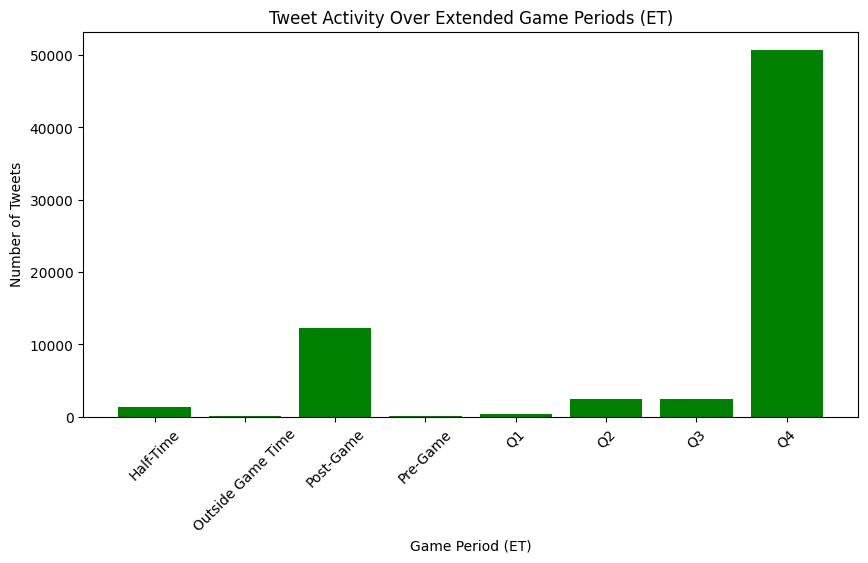

In [20]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert 'created_at' to datetime and set timezone to UTC
df["created_at"] = pd.to_datetime(df["created_at"], errors="coerce", utc=True)

# Convert to Eastern Time (ET)
df["created_at_et"] = df["created_at"].dt.tz_convert("America/New_York")

# Define extended Super Bowl time periods in ET
extended_periods_et = {
    "Pre-Game": ("2025-02-09 17:00:00", "2025-02-09 18:30:00"),  # 5:00 PM to 6:30 PM ET
    "Q1": ("2025-02-09 18:30:00", "2025-02-09 19:15:00"),
    "Q2": ("2025-02-09 19:15:00", "2025-02-09 20:15:00"),
    "Half-Time": ("2025-02-09 20:15:00", "2025-02-09 20:45:00"),
    "Q3": ("2025-02-09 20:45:00", "2025-02-09 21:30:00"),
    "Q4": ("2025-02-09 21:30:00", "2025-02-09 22:15:00"),
    "Post-Game": ("2025-02-09 22:15:00", "2025-02-10 00:00:00")  # 10:15 PM to Midnight ET
}

# Assign periods to tweets based on their timestamps in ET
def categorize_extended_period(timestamp):
    for period, (start, end) in extended_periods_et.items():
        if pd.Timestamp(start, tz="America/New_York") <= timestamp < pd.Timestamp(end, tz="America/New_York"):
            return period
    return "Outside Game Time"

df["Game_Period_ET"] = df["created_at_et"].apply(categorize_extended_period)

# Count tweets per extended period in ET
tweet_counts_extended_et = df["Game_Period_ET"].value_counts().sort_index()

# Convert to DataFrame for visualization
tweet_counts_extended_et_df = tweet_counts_extended_et.reset_index()
tweet_counts_extended_et_df.columns = ["Game Period", "Tweet Count"]

# Display the updated dataset
print("Tweet Activity Over Extended Game Periods (ET)")
print(tweet_counts_extended_et_df)

# Plot tweet activity with extended periods in ET
plt.figure(figsize=(10,5))
plt.bar(tweet_counts_extended_et_df["Game Period"], tweet_counts_extended_et_df["Tweet Count"], color="green")
plt.xlabel("Game Period (ET)")
plt.ylabel("Number of Tweets")
plt.title("Tweet Activity Over Extended Game Periods (ET)")
plt.xticks(rotation=45)
plt.show()


In [21]:
# Save the tweet activity data to a CSV file
output_file_path = "tweet_activity_extended_ET.csv"
tweet_counts_extended_et_df.to_csv(output_file_path, index=False)

print(f"Saved tweet activity data to {output_file_path}")


Saved tweet activity data to tweet_activity_extended_ET.csv
